In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes = pd.read_csv('C:/Users/EJ/Documents/Hilda/diabetes.csv')

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_fix:
    diabetes[column] = diabetes[column].replace(0, diabetes[column].median())
print((diabetes[columns_to_fix] == 0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [11]:

Q1 = diabetes['Insulin'].quantile(0.25)
Q3 = diabetes['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = diabetes[(diabetes['Insulin'] >= lower_bound) & (diabetes['Insulin'] <= upper_bound)]

In [13]:

print(f"Jumlah duplikat: {diabetes.duplicated().sum()}")
diabetes = diabetes.drop_duplicates()

print(f"Jumlah diabetes setelah menghapus duplikat: {diabetes.shape[0]}")

Jumlah duplikat: 0
Jumlah diabetes setelah menghapus duplikat: 768


In [19]:
diabetes.shape

(768, 9)

In [20]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


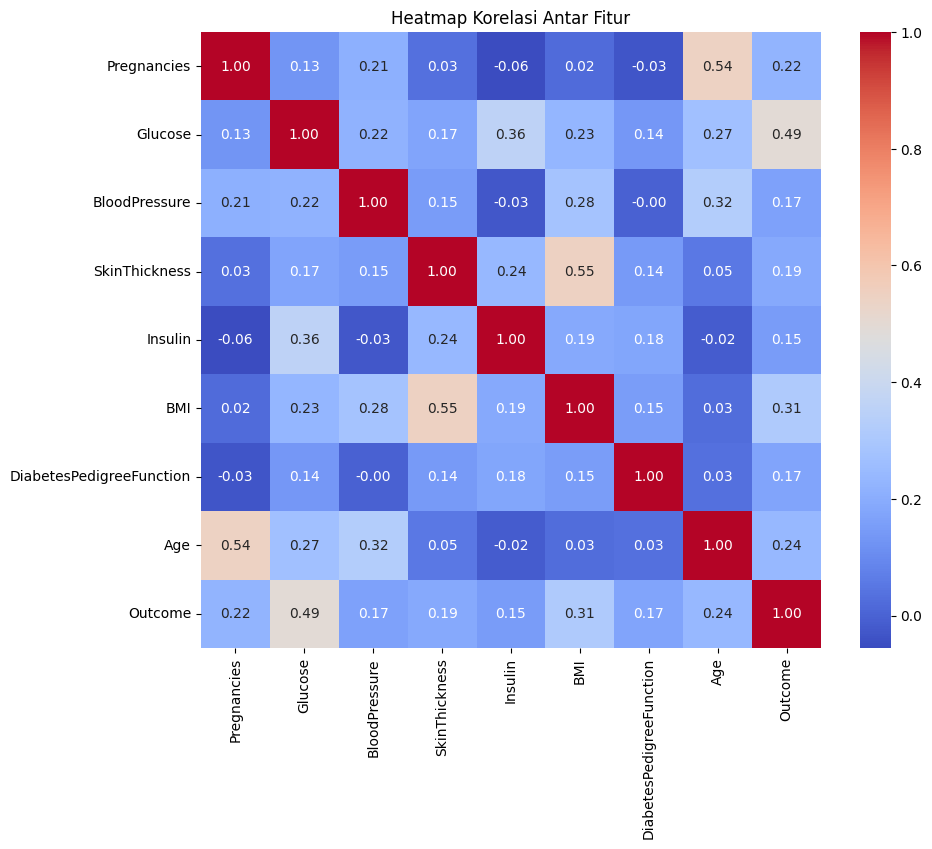

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [22]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.16559570811480634


In [27]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.27873869354439884


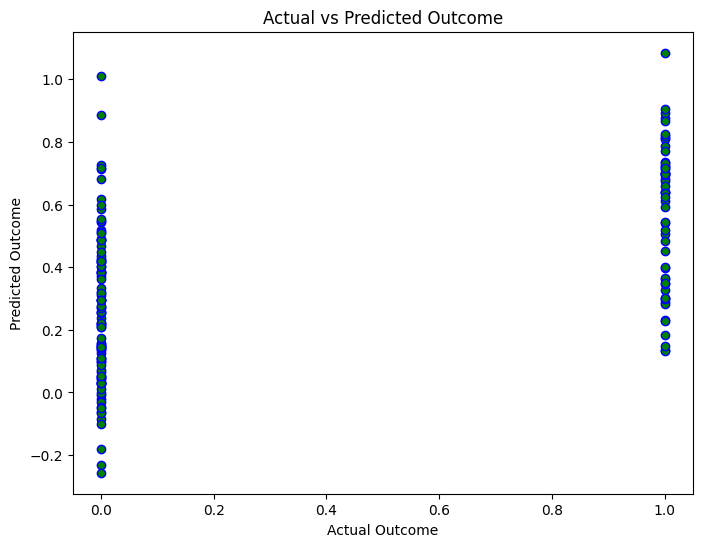

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', edgecolor='blue')
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Actual vs Predicted Outcome')
plt.show()

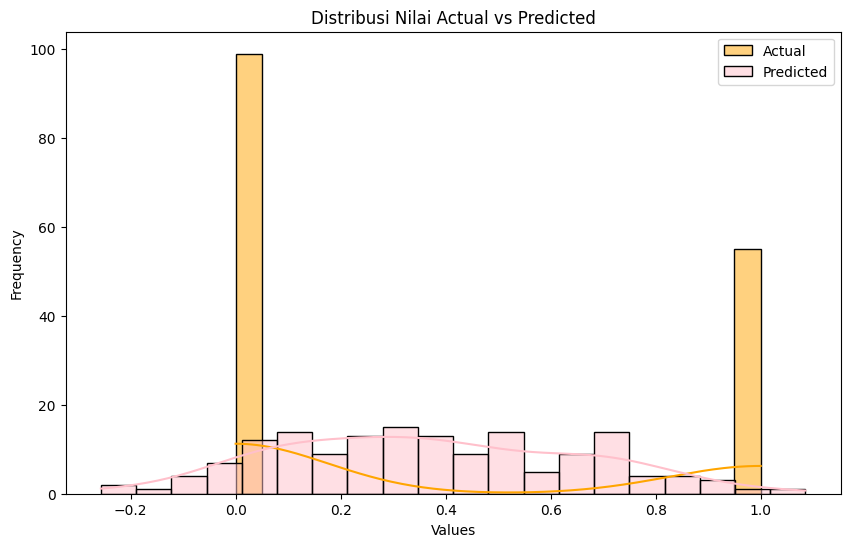

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='orange', label='Actual', kde=True, bins=20)
sns.histplot(y_pred, color='pink', label='Predicted', kde=True, bins=20)
plt.title('Distribusi Nilai Actual vs Predicted')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

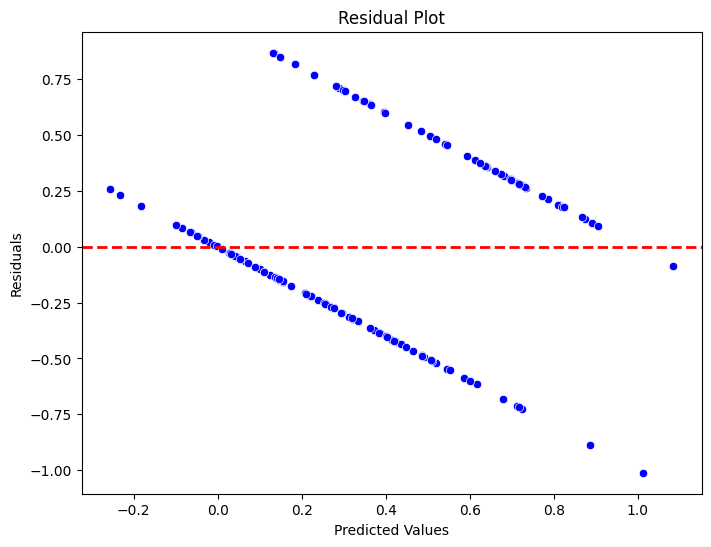

In [37]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

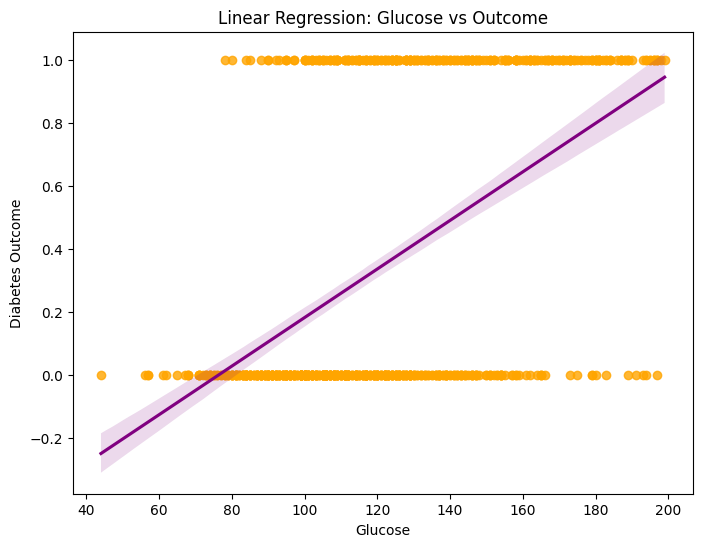

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(x=diabetes['Glucose'], y=diabetes['Outcome'], color='orange', line_kws={'color': 'purple'})
plt.title('Linear Regression: Glucose vs Outcome')
plt.xlabel('Glucose')
plt.ylabel('Diabetes Outcome')
plt.show()